# Final Project
<h2>Predicting Diabetes</h2>
<h2>Vladyslav Honcharuk</h2>

<h2>Index</h2>

- [Abstract](#Abstract)
- [Introduction](#Introduction)
- [The Data](#The-Data)
    - [Import of the Data](#Import-of-the-Data)
    - [Data Preparation and Exploration](#Data-Preparation-and-Exploration)
    - [Correlation](#Correlation)
- [Implementation of ML models](#Implementation-of-ML-models)
    - [Machine Learning Algorithms](#Machine-Learning-Algorithms)
    - [Model Training and Evaluation](#Model-Training-and-Evaluation)
- [Conclusion](#Conclusion)

[Back to top](#Index)

##  Abstract

Diabetes is a chronic disease that affects millions of people globally. Early detection and management of diabetes can help prevent further complications. In this project, I will use machine learning to predict whether a patient has diabetes based on various health parameters. I will use a publicly available dataset, perform some preprocessing and build actual model for the binary classification of whether the patient has diabetes or not.

[Back to top](#Index)

## Introduction

Diabetes is a chronic medical condition in which the body is unable to regulate the amount of sugar (glucose) in the blood. This is because either the pancreas is not producing enough insulin (a hormone that regulates blood sugar), or the body is not effectively using the insulin it produces. As a result, high levels of glucose in the blood can cause various health problems, including damage to the heart, blood vessels, eyes, kidneys, and nerves. There are two main types of diabetes: type 1 diabetes, which is an autoimmune disease that destroys the cells that produce insulin, and type 2 diabetes, which is caused by a combination of insulin resistance and a reduced ability to produce insulin. Both types of diabetes can be managed through lifestyle changes (such as exercise and healthy eating) and, in some cases, medications or insulin therapy.

The main goal of my project is to buid different models to predict whether the patient has diabetes or not with the help of multiple Machine Learnign algorithms and then choose the best one. Throughout the project I performed several tasks - explored the dataset to become familiar with it, showed some overall and statistical insights and ploted several graphs, prepared the data by deleting and imputing the missing values, deleted redundant properties and discarded the outliers, built a correlation heatmap to discover the most correlated with the target property properties. Finally, I have described how different models work, built different models and chose the one that performs great on the test set.

Explanation of each step in detail:

**Data collection**: I took a public dataset from Kaggle which contains patients with and without diabetes, there is no division by type of the diabetes, which means that classification problem is binary.

**Data preprocessing**: I cleaned and preprocessed the data to remove any missing or inconsistent values and ensure the data is suitable for analysis.

**Feature selection**: I selected the most relevant features from the health parameters to use them in the creation of models.

**Model selection**: Since it is a binary classification problem suitable ML algorighm should be selected such as logistic regression, decision trees, or random forests.

**Model training**: I trained the machine learning models and to ensure the performance on an unseed data I used cross-validation. 

**Model evaluation**: I evaluated the performance of the models using various metrics and chose the best model based on the performance.



[Back to top](#Index)

## The Data

[Back to top](#Index)

### Import of the Data


For this project I will be using Python programming language which is a powerfull tool for solving Machine Learning problems. Therefore the first step of my project is to include all the necessary libraries that give some additional functionality to the language.

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The dataset I will be using is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It is taken and slightly reduced from a big database, so that particular group of people was chosen, exactly females at least 21 years old of Pima Indian heritage.

Link to the dataset location, online platform Kaggle: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Dataset contains 9 columns and 768 rows. There are 8 features and 1 target variable: 

**Pregnancies**: number of times pregnant

**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm) 
 
**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction:** Diabetes pedigree function

**Age:** Age (years)

**Outcome:** Class variable (0 for absense of diabetes or 1 for presence) 268 of 768 are 1, the others are 0 

The data is stored in a Comma Separated Values file (CSV).

In [2]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Lets have a look at some overall and statistical infomation about dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Since all the columns have numerical values statistical information will be computed for each property.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


[Back to top](#Index)

### Data Preparation and Exploration

The first thing that should be done is the check for missing values.

In [5]:
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

The empty output doesn't mean that data doesn't have missing values, they are just not declared as NaN. Missing values in the Glucose, BloodPreasure, SkinThickness, Insulin, BMI columns have values of 0. Lets replace 0 values with NaN for the analysis of missing values and count this missing values.

In [6]:
data_cp = data.copy(deep = True)
data_cp[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_cp[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

data_cp.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

To impute the missing values the method should be selected (with mean, median etc.), and to choose the method the distribution of the property should be considered, since if there is some skew if the distribution the mean value would be highly impacted and would be a bad choice to use for imputing the missing values. Therefore if there is a skew I will use median for NaN replacement, but if the distribution is normal I will use mean.

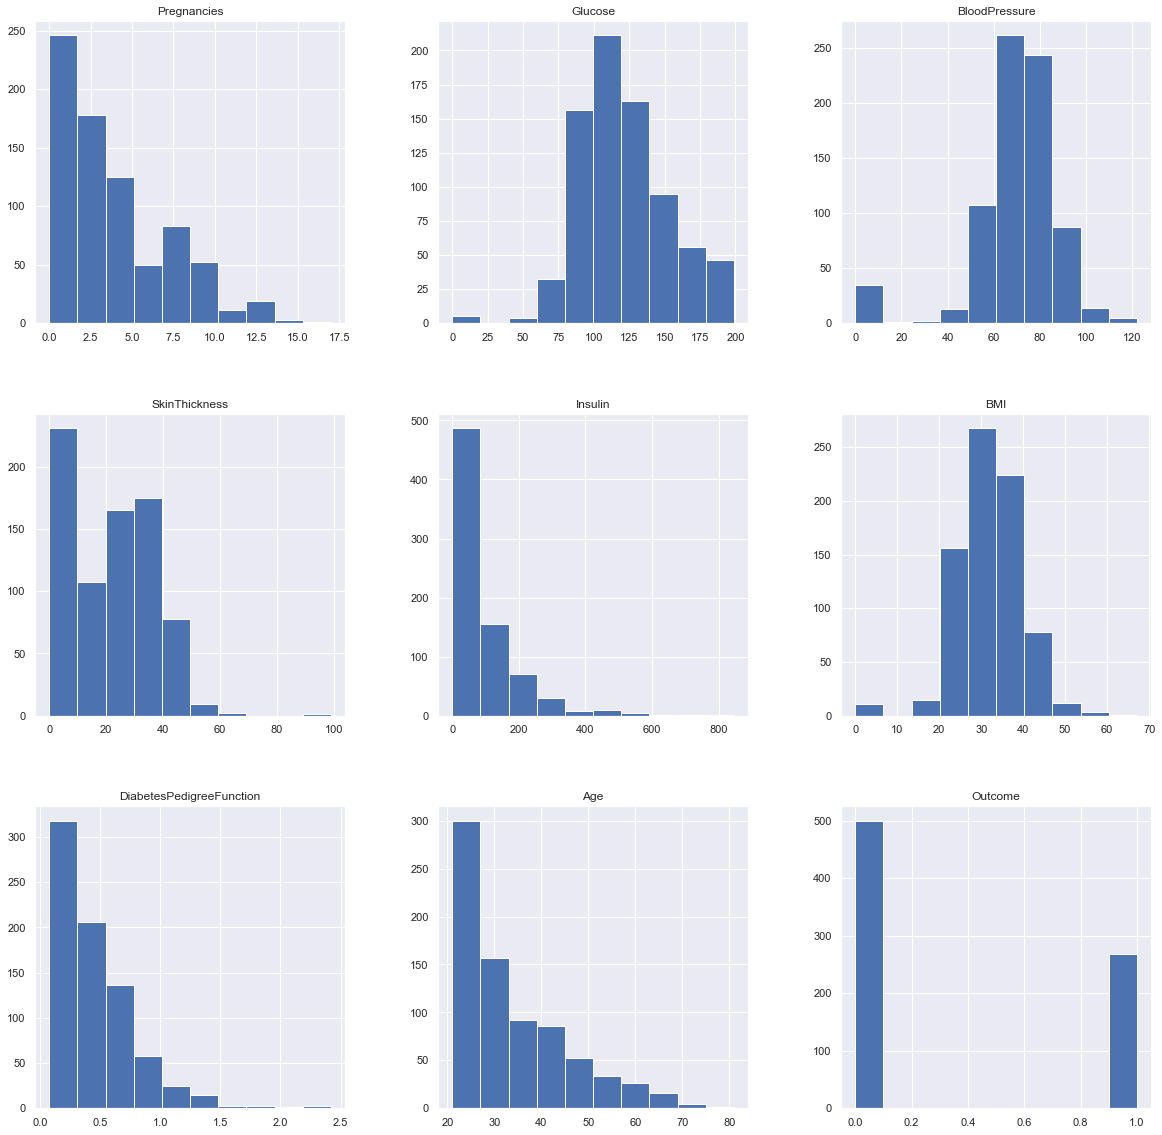

In [7]:
distributions = data.hist(figsize = (20,20))

Glucose and BloodPressure and BMI has nearly normal distributions so I will use the mean of them, on the other hand SkinThickness and Insulin are right-skewed, so I would have used median, but because they have a lot of missing values which using median will increase the number of outliers which may lead to the decrease of the performance of the models and I don't want to just drop this properties I would simply use mean for all properties.

In [8]:
data_cp['Glucose'].fillna(data_cp['Glucose'].mean(), inplace = True)
data_cp['BloodPressure'].fillna(data_cp['BloodPressure'].mean(), inplace = True)
data_cp['BMI'].fillna(data_cp['BMI'].mean(), inplace = True)
data_cp['SkinThickness'].fillna(data_cp['SkinThickness'].mean(), inplace = True)
data_cp['Insulin'].fillna(data_cp['Insulin'].mean(), inplace = True)

Lets build distributions of the data fith imputed NaNs.

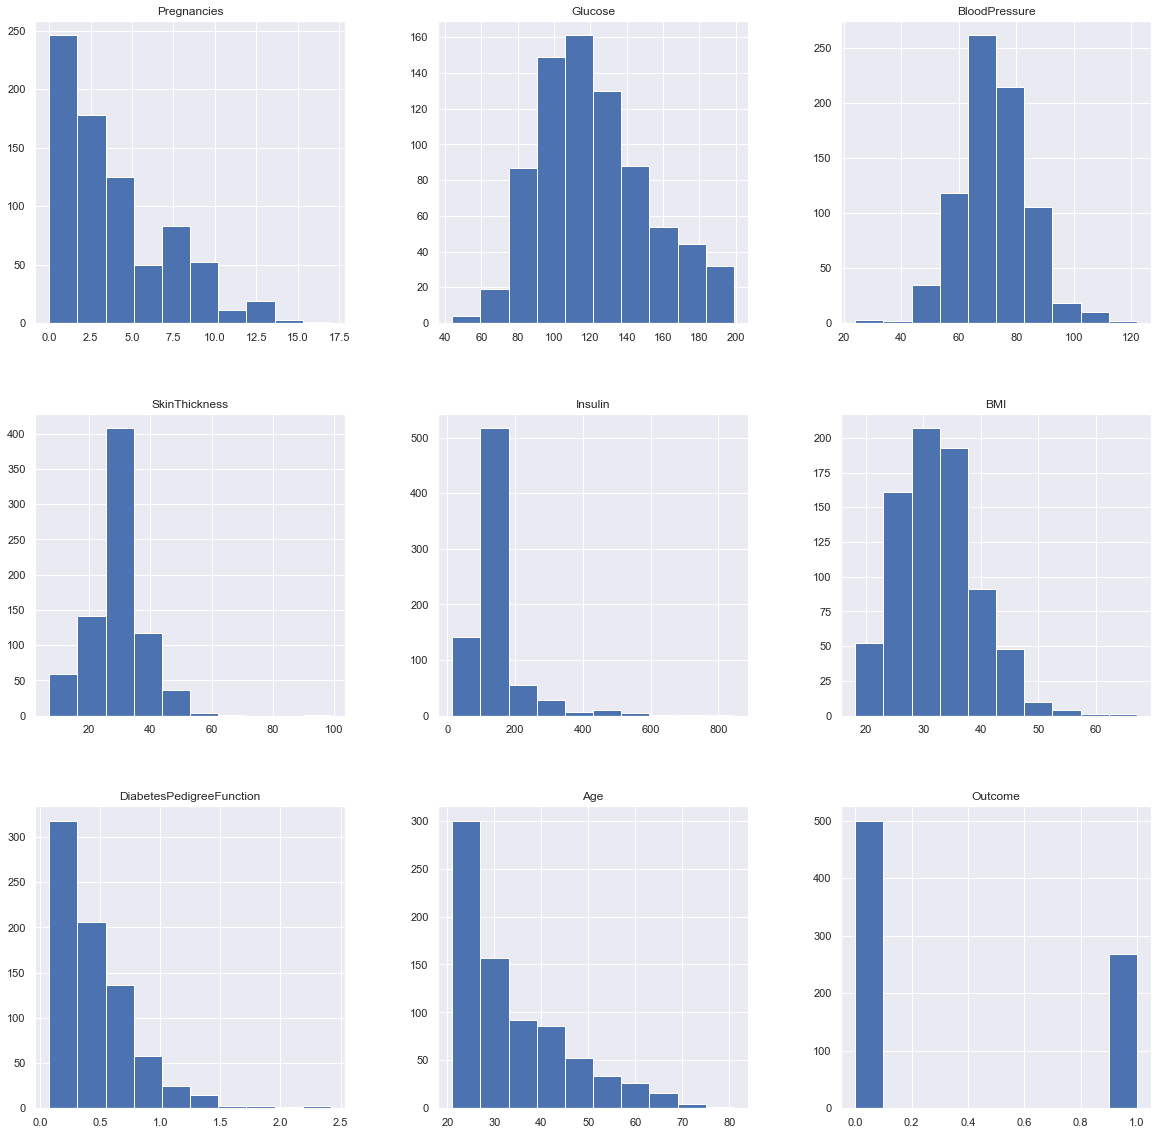

In [9]:
distributions = data_cp.hist(figsize = (20,20))

The distributions slightly changed, they got rid of outliers in a form of missing values and the value of their mean obviously increased since the values that were previously 0 were replaced with higher ones. 

The following is the bar plot of the feature variable Outcome values

Text(0.5, 1.0, 'Count of Cases with Outcome 0 and Outcome 1')

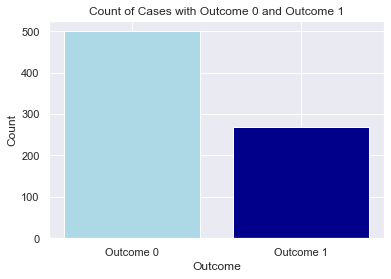

In [10]:
outcome_0 = sum(data['Outcome'] == 0)
outcome_1 = sum(data['Outcome'] == 1)

x = np.array(['Outcome 0', 'Outcome 1'])
y = np.array([outcome_0, outcome_1])
colors = ['lightblue', 'darkblue']
plt.bar(x, y, color=colors)

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Cases with Outcome 0 and Outcome 1')


The data is biased because the number of the patient without diabetes is almost twice as much as the patients with diabetes.

Next lets look at the relationships between each of the feaures. On the pair plot below there is scatterplots of paired features with the color of Outcome. From only this plot I can make some assumptions, for example woman with higher glucose level tend to have higher probability of having a diabetes, which is logical. This plot is the most informative plot I can make.

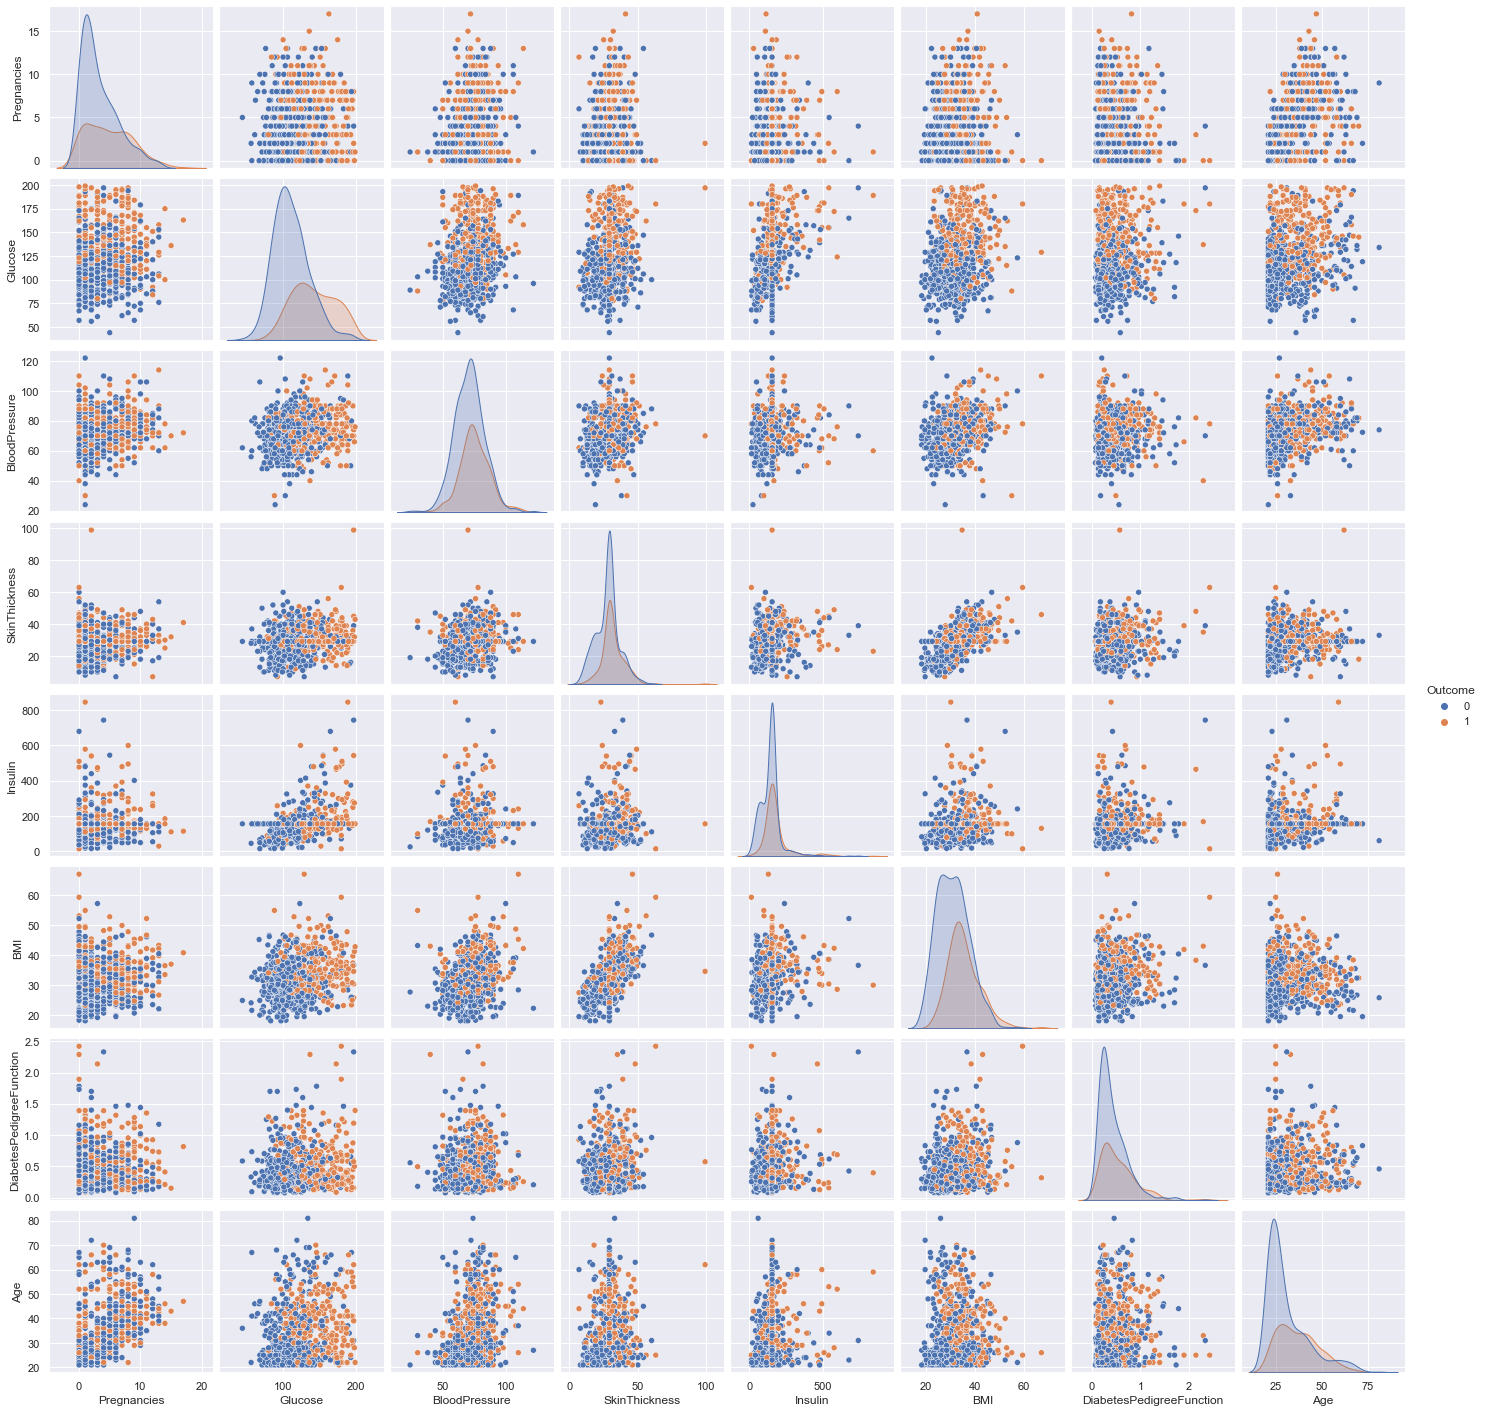

In [11]:
pair_plot=sns.pairplot(data_cp, hue = 'Outcome')

The next step is checking whether my dataset has any duplicate rows, it seems there is no.

In [12]:
print("Number of duplicate rows : ", data_cp[data_cp.duplicated()].shape[0])

Number of duplicate rows :  0


Lets check if there is any outliers in the data.

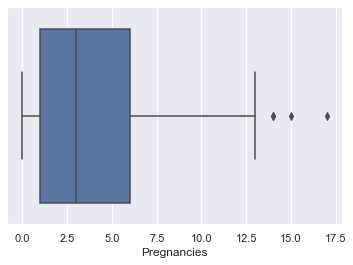

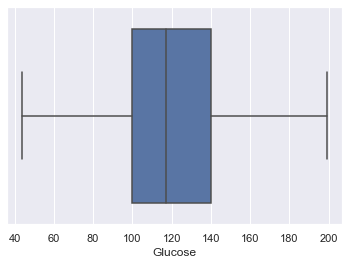

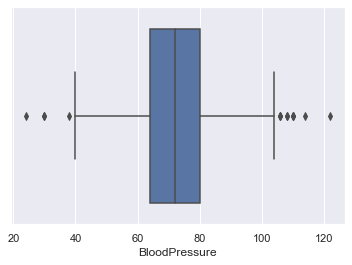

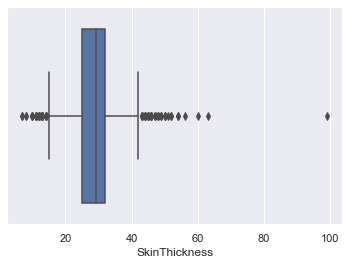

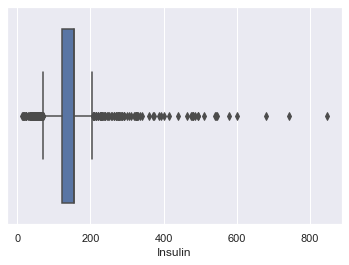

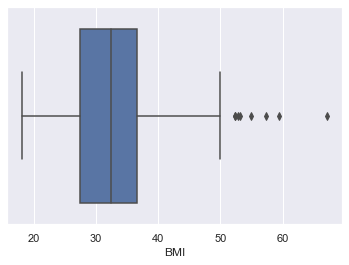

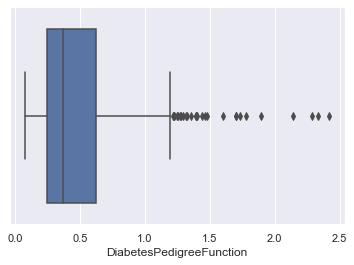

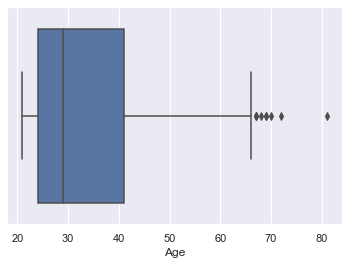

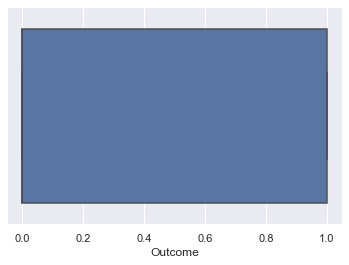

In [13]:
def find_outliers(data):
    for key, value in data.iteritems():
        plt.figure()
        sns.boxplot(x=data[key])
        
find_outliers(data_cp)

At first I thought that there is no need to remove outliers, but after creating the ML models I realized that the data was highly overfitted, and one of the methods of reducing the overfitting is to remove outliers. To do so I would use one of the simplest methods, remove patients properties which contains extreme outliers, which are located further that 3 standart deviations from the mean, which indicates very low probability of happening if the distribution is normal, which should be normal because it is a real life data, and normality is everywhere.

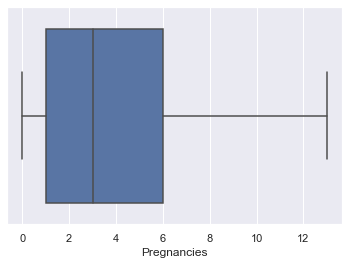

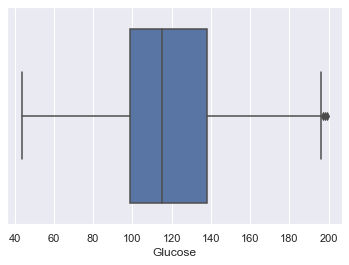

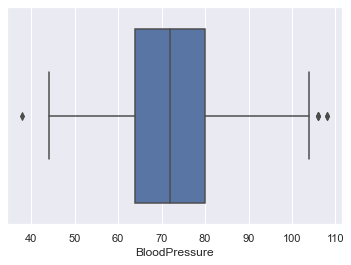

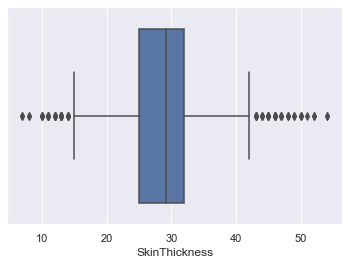

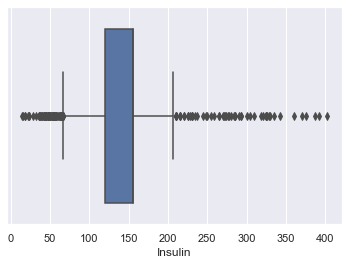

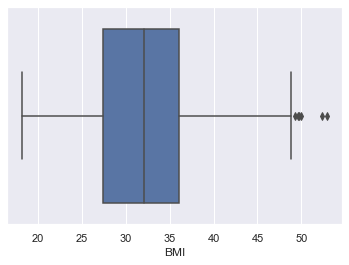

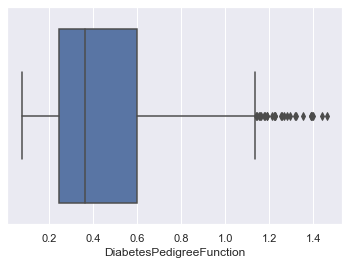

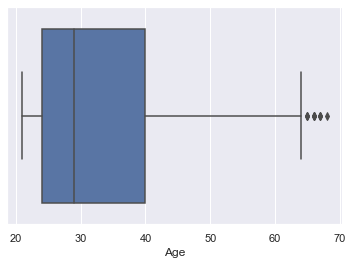

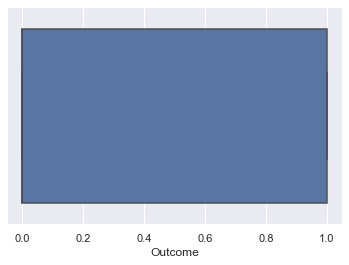

In [14]:
from scipy import stats
z = np.abs(stats.zscore(data_cp))
data_cp_o = data_cp.copy(deep=True)
data_cp_o = data_cp_o[(z<3).all(axis=1)]

find_outliers(data_cp_o)

As a result I removed 49 patients from the dataset, which were considered to have properties with extreme outliers. I expect increase in accuracy, but a slightly decrease in specificity which is the accuracy of determining the patients with diabetes.

In [16]:
data_cp_o.shape

(719, 9)

For the sake of Exploratory Data Analysis (EDA) I will add a couple of plots to showcase some insights, however some of them were included in the previous plots.

Scatter plot of the Glucose/Blood Preasure dependance with the Outcome(yellow for woman with diabetes, and purple for the ones without). It seems that blood preassure does not really affect the presence of diabetes, patients are almost equally distributed, unlike the glucose level which is obviously higher in the patients that has diabetes.

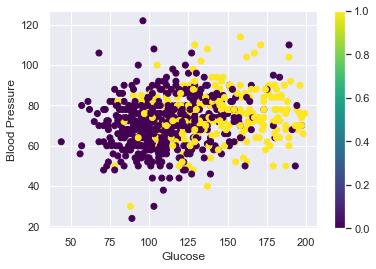

In [17]:
plt.scatter(data_cp['Glucose'], data_cp['BloodPressure'], c=data_cp['Outcome'], cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.colorbar()
plt.show()

Histogram of the BMI frequency with the Outcome as hue(orange for woman with diabetes, and blue for the ones without). It seems that people with diabetes tend to have higher BMI, then the ones with lower and almost all people with extreme BMI around 50 and higher have diabetes.

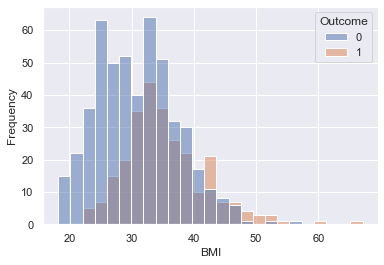

In [18]:
sns.histplot(x='BMI', hue='Outcome', data=data_cp, kde=False)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

Another important thing to consider when transforming a dataset is data normalization and standardization, which are used to scale the data to a specific range, usually from 0 to 1. However, since I am going to use decision tree based algorithms it is better to not to perform this two operations, because they are not sensitive to the scale of the features. Moreover this operations can even worsen the performance of algorighms. If I had used a KNN Classifier I would have performed this operations. Nevertheless the scaling would be performed by the following code: 
```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(data_cp.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
```

In conclusion I will say that exploring and transforming the dataset is one of the most important task in building a ML model, since it gives you more understanding about the data you work with and makes the dataset better one, which will result in higher performance of ML models.

[Back to top](#Index)

### Correlation

Below I created a heatmap of the correlation of all the properties, which can give a huge insight about which properties are correlated. However, there is no properties that are highly correlated, the highest correlation coefficients are around 0.5, which means that having one value of a certain property we can estimate the value of another property only in the half of the cases.

Text(0.5, 1.0, 'Pearson Correlation')

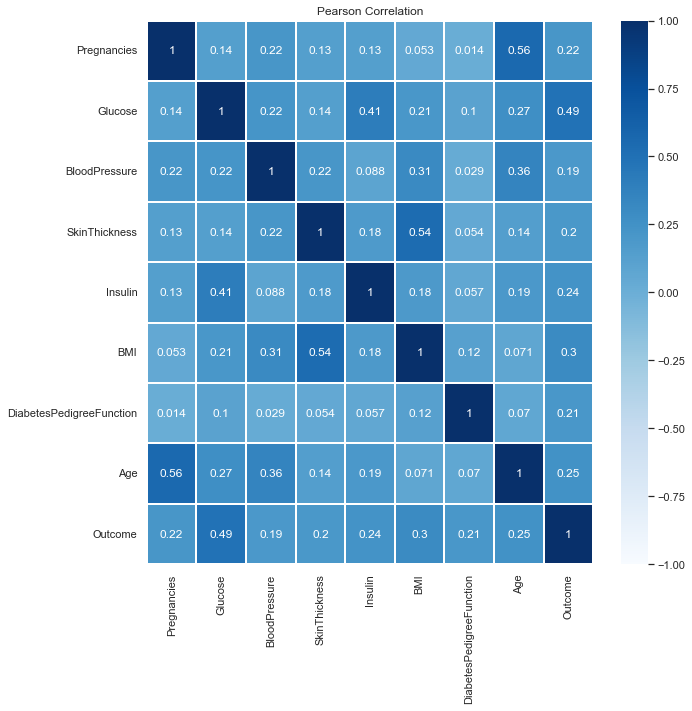

In [19]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data_cp_o.corr(), vmin=-1,vmax=1, cmap = "Blues", annot=True,
linewidth=0.1)
plt.title("Pearson Correlation")

I decided to not to remove any properties, because they have almost the same correlation with the target variable, and the number of features is not very big, and removing some features may remove some hints from the data that ML algorithms will be using.

[Back to top](#Index)

## Implementation of ML models

[Back to top](#Index)

### Machine Learning Algorithms

In this project I decided to use 3 supervised machine learning algorithms:

**Logistic Regression**: A simple and widely used algorithm for binary classification that models the relationship between the features and the target variable using a logistic function, which is used to model the probability of the positive class. The logistic function maps any input value to a value between 0 and 1, which can be interpreted as the probability of the positive class. The parameters of the logistic function are estimated from the training data, and the resulting model can be used to make predictions on new instances. The coefficients of the logistic function represent the effect of each feature on the probability of the positive class, and can be used to understand the relationship between the features and the target variable. Logistic regression is also relatively fast to train and can handle large datasets, making it a good choice for many binary classification problems.

**Decision Trees**: A tree-based algorithm that splits the data into regions based on the values of the features, with the goal of maximizing the separation between the two classes. A decision tree consists of a series of nodes and branches, where each node represents a decision based on the value of one of the features, and each branch represents the result of that decision. The goal of the algorithm is to create a tree that accurately splits the data into two classes, with the leaves of the tree corresponding to the predicted class of each instance. The process of building a decision tree involves selecting the feature that provides the best separation between the two classes, and recursively splitting the data based on that feature. This process is repeated until some stopping criterion is met, such as a maximum tree depth, a minimum number of samples in a leaf node, or perfect class separation. One disadvantage is that decision trees are prone to overfitting, where the tree becomes too complex and memorizes the training data instead of generalizing to new instances.

**Random Forest**: An ensemble of decision trees, where multiple trees are built and their predictions are combined to produce a final prediction, the model becomes more robust and accurate. In a random forest, a large number of decision trees are trained on random subsets of the training data. The final prediction is made by taking the average or majority vote of the predictions made by the individual trees. This randomization and combination of many trees helps to reduce overfitting, as the errors made by individual trees are averaged out by the ensemble. In the context of binary classification, each decision tree in the random forest is trained to predict the class of a given instance. The final prediction is made by taking the majority vote of the individual tree predictions.

The algorithms are placed from the simplest to the most complex, so I will have an opportunity how much the complexity of the algorithm can affect the performance.



[Back to top](#Index)

### Model Training and Evaluation

The dataset should be divided into training and testing set to evaluate the model on an unseen data. When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing set. This would lead to over-fitting and underfitting problems, which can be avoided by using cross-validation. Also a helpfull technic is a stratification. Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

Before implementing any algorithm it is a good practice to compute the baseline accuracy which can be computed by number of the most frequent class instances by the number of all instances, it this case divide the number of healthy patients by the number of all patients.

$500/768 = 0.65$

So, If the accuracy will be higher than 0.65 the performance would be valid.

I would use 20% for the test set.

In [20]:
from sklearn.model_selection import train_test_split

X = data_cp_o.drop(["Outcome"], axis=1)
y = data_cp_o["Outcome"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Standardization technic to compare the performance, sometimes models benefit from it, but in general it decreases the 
# performance
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Initialization of the classifiers
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Training of the classifiers
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Testing of the classifiers
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# Evaluation of the accuracies
lr_acc = accuracy_score(y_test, lr_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print("Logistic Regression accuracy:", round(lr_acc, 3))
print("Decision Tree accuracy:", round(dt_acc, 3))
print("Random Forest accuracy:", round(rf_acc, 3))

Logistic Regression accuracy: 0.799
Decision Tree accuracy: 0.743
Random Forest accuracy: 0.819


I created 3 models: Logistic Regression, Decision Tree and Random Forest, trained them and avaluated their performance on the unseen data. I used the default models from sklearn library, so there is still a place for the tuning of their hyperparameters. For making some insights I used a random seed so that models stay the same, since decision tree-based models change every time they trained. The best model Random Forest got 82% accuracy on the test set. Logistic Regression performed slightly worse - 80%, and the worst performance showed Decision Tree alogorithm - 74%. Since Random Forest chooses the best tree out of the pool of the trees it creates I would say that created Decision Tree is not the best version of a tree that could be built, and tuning some hyperparameters or pruning the tree to decrease the overfitting may improve the accuracy.

However, simply looking at accuracy is not a good way, because the dataset contains patients, and number of patients with disease is 2 times smaller than the number of healthy patients, there could be a situation when model finds well healthy patient but struggles to find diseased ones, to check if such situation occurs there is a need to create a confusion matrix and to compute precision, recall, and specificity of the model. Below is a functions that creates classification report and confusion matrix.

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def info(predicted_target, testing_target, name):
    print(classification_report(predicted_target, testing_target))
    
    print("Confusion matrix:")
    
    conmat = confusion_matrix(testing_target, predicted_target)

    val = np.mat(conmat) 

    df_cm = pd.DataFrame(val, index=[0, 1])

    plt.figure()

    heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right")
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha="right")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    plt.title(f"{name} Model Results")

    plt.show()    

              precision    recall  f1-score   support

           0       0.83      0.89      0.85        96
           1       0.73      0.62      0.67        48

    accuracy                           0.80       144
   macro avg       0.78      0.76      0.76       144
weighted avg       0.79      0.80      0.79       144

Confusion matrix:


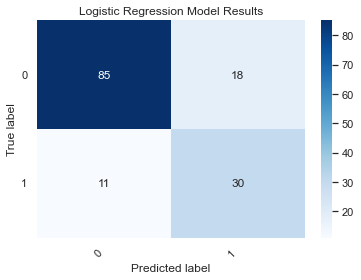

In [23]:
info(y_test, lr_pred, "Logistic Regression")

Logistic Regression finds healthy patients much better than diseased, precision and recall of the diseased class are much smaller than the ones of the healty class. This model has a high type 1 error - classifies patients as diseased, when they are not, which is not that scary as type 2 error in that case. It is better for a patient to undergo some additional medical analyses, than to think that they are healthy when they are not.

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        96
           1       0.61      0.62      0.62        48

    accuracy                           0.74       144
   macro avg       0.71      0.71      0.71       144
weighted avg       0.74      0.74      0.74       144

Confusion matrix:


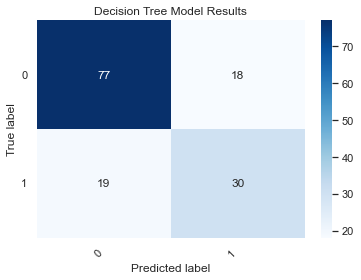

In [24]:
 info(y_test, dt_pred, "Decision Tree")

Decision Tree has slightly worse performance on the healthy patients, which is better than the decrease of the specificity.

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        96
           1       0.74      0.71      0.72        48

    accuracy                           0.82       144
   macro avg       0.80      0.79      0.79       144
weighted avg       0.82      0.82      0.82       144

Confusion matrix:


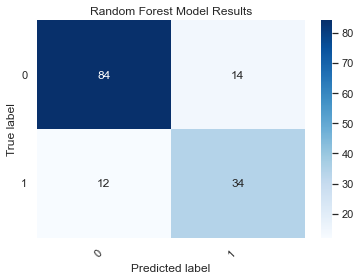

In [25]:
info(y_test, rf_pred, "Random Forest")

Random Forest is the best model I managed to create, the specificity is much higher, it manages to detect diseased patients in 71% of the cases.

[Back to top](#Index)

## Conclusion

In this project my main goal was to explore the dataset of diabetes, get familiar with the data, perform EDA and create ML models to solve the task of the classification(prediction). I created multiple plots to represent the data, cleaned the data and used the most popular ML models for binary classification. The best model I created is a Random Forest model which has 82% accuracy, which is a good result (I hope). The model can still be improved. However this is a clinical data and 82% accuracy means that only 82% of the patients would have their correct diagnosis, this is a small number, because almost 20% of the human lives could be in danger if the model  classify them as healthy when they are not, so such model cannot be used in real life, but if the accuracy could be improved to 90% with good specificity than such model would serve as a great help to the doctors.